# <center>APLU Western Cluster Curricular Analytics Study</center>

In this notebook we analyze the curricula and degree plans associated with a set of programs at universities in the APLU Western Cluster.  This cluster of schools is one of the "transformation clusters" formed as a part of APLU's 
[Powered by Publics Initiative](https://www.aplu.org/projects-and-initiatives/center-for-public-university-transformation/powered-by-publics) <cite data-cite="APLU:18">(APLU, 2019)</cite>. The schools in the Western Cluster include:

- Colorado State University
- Langston University
- Montana State University
- New Mexico State University
- North Dakota State University
- Oklahoma State University
- South Dakota State University
- University of Idaho
- University of Nevada-Reno
- University of Wyoming
- Utah State University

The analyses in this notebook makes use of the [Curricular Analytics toolbox](https://github.com/CurricularAnalytics/CurricularAnalytics.jl) 
built using the Julia programming language  and available as open source software (<cite data-cite="he:19">Heileman, et. al., 2019</cite>). As a starting 
point, you may find it useful to read the [toolbox documenation](https://curricularanalytics.github.io/CurricularAnalytics.jl/latest/), as well as 
the <cite data-cite="he:18">Heileman, et. al., (2018)</cite> paper listed in the [References](#References) 
section below.

If you are interested in joining the community of scholars working to apply curricular analytics, please 
feel free to make suggestions about future development or [contribute](https://curricularanalytics.github.io/CurricularAnalytics.jl/latest/contributing.html) to the 
CurricularAnalytics.jl project.


In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [1]:
using CurricularAnalytics, CurricularVisualization
using Glob
using StatsPlots

┌ Info: Precompiling CurricularVisualization [fbaee398-1ac9-4ee2-a69c-ef17203eefbf]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

┌ Warning: Package OffsetArrays does not have Adapt in its dependencies:
│ - If you have OffsetArrays checked out for development and have
│   added Adapt as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with OffsetArrays
└ Loading Adapt into OffsetArrays from project dependency, future warnings for OffsetArrays are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
│   exception = Required dependency OffsetArrays [6fe1bfb0-de20-5000-8ca7-80f57d26f881] failed to load from a cache file.
└ @ Base loading.jl:1042
┌ Warning: Package OffsetArrays does not have Adapt in its dependencies:
│ - If you have OffsetArray

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11363919479042345723\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2072126527726622693\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11363919479042345723\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for CurricularVisualization [fbaee398-1ac9-4ee2-a69c-ef17203eefbf]
│   exception = ErrorException("Required dependency OffsetArrays [6fe1bfb0-de20-5000-8ca7-80f57d26f881] failed to load from a cache file.")
└ @ Base loading.jl:1042


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2371300438767725302\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9170299326510949412\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2371300438767725302\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
┌ Warning: Package OffsetArrays does not have Adapt in its dependencies:
│ - If you have OffsetArrays checked out for development and have
│   added Adapt as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with OffsetArrays
└ Loading Adapt into OffsetArrays from project dependency, future warnings for OffsetArrays are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
│   exception = Required dependency OffsetArrays [6fe1bfb0-de20-5000-8ca7-80f57d26f881] failed to load from a cache file.
└ @ Base loading.jl:1042
┌ Warning: Package OffsetArrays does not have Adapt in its dependencies:
│ - If you have OffsetArrays checked out for development and have
│   added Adapt as a dependency but haven't u

## Create the Data Structures 
Degree plans associated with four different disciplines (animal science, mechanical engineering, music education, and psychology) were collected from each of the eleven schools in the cluster. The degree plans were stored as CSV files using the format for degree plans specified in the Curricular Analytics toolbox.  The files are organized in a directory structure that is assumed to be in the same directory as this notebook as follows:  `./cluster/<school-name>/<program-name.csv>`

Asuuming the aforementioned directory structure, we first create an array called `schools` containing the names of the schools in the cluster, given by the subdirectory names in the ./cluster directory.

In [2]:
schools = Array{String,1}()
for path in glob("*", "./cluster")
  push!(schools, replace(path, "./cluster/" => ""))
end

Next, we will read each of the degree plans, and store them as `DegreePlan` objects in a `school_plans` dictionary data structure.

In [3]:
schools_plans = Dict{String, Dict{String, DegreePlan}}()
for school in schools
  plans = Dict{String, DegreePlan}()
  programs = glob("*", "./cluster/$(school)")
  for program in programs
    program_name = replace(split("$(program)", "/")[end], ".csv" => "")
    plans[program_name] = read_csv(program)
    complexity(plans[program_name].curriculum)  # compute the curricular complexity of the degree plan
  end
  schools_plans[school] = plans
end

You can now use this dictionary to access and visualize the degree plan associated with a particular program at a particular school as follows:

In [4]:
dp = schools_plans["colorado-state"]["music-education"]
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src => "http://localhost:8156",:id => "curriculum",:events => Dict{Symbol,WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Music Education\",\"dp_name\":\"4-Year Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"CO 150\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":22.0,\"centrality\":0,\"blocking factor\":14,\"delay factor\":8.0},\"nameSub\":\"MU 117\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":7.0,\"centrality\":0,\"blocking factor\":3,\"delay factor\":4.0},\"nameSub\":\"MU 127\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":4.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":2.0},\"nameSub\":\"MU 131\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"MU 150\",\"id\":5,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 251\",\"id\":6,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 272\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 286\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENSEMBLE\",\"id\":9,\"credits\":1,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":19.0,\"centrality\":48,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"MU 118\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":6.0,\"centrality\":4,\"blocking factor\":2,\"delay factor\":4.0},\"nameSub\":\"MU 128\",\"id\":11,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"MU 151A\",\"id\":12,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 252B\",\"id\":13,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MU 272\",\"id\":14,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENSEMBLE\",\"id\":15,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AUCC 3B\",\"

## Curricular Analytics
First we will analyze the structural properties of the various curricula provided by the programs at the cluster schools.  This will involve analyzing the structural properties of a single curriculum.  The structural properties of a curriculum are determined by the underlying structural properties of its corresponding curriculum graph (i.e., the graph showing the prerequisite relationships between the courses in a curriculum, ignoring term information).

Next we will analyze the complexities associated with the curricula in each of four disciplines across all schools in the cluster, namely animal science, mechanical engineering, music education, and psychology.  That is, we will look at the intra-discipline curricular complexity for each of these disciplines.  Finally, we will compare the inter-discipline curricular complexity statistics of the schools in the cluster.

### Analysis of a single curriclum 
The `basic_metrics()` function can be used to output a set of basic metrics associatd with a curriculum. As an example, here are the basic curricular metrics associated with the Music Education program at Colorado State Univeristy:

In [5]:
dp = schools_plans["colorado-state"]["music-education"]
metrics = basic_metrics(dp.curriculum)
println(String(take!(metrics)))


Colorado State University 
Curriculum: Music Education
  credit hours = 120
  number of courses = 62
  Blocking Factor --
    entire curriculum = 96
    max. value = 14, for course(s): MU 117
  Centrality --
    entire curriculum = 1043
    max. value = 240, for course(s): EDUC 450
  Delay Factor --
    entire curriculum = 200.0
    max. value = 8.0, for course(s): MU 117, MU 118, EDUC 275, MU 217, EDUC 340, EDUC 350, EDUC 386, EDUC 475, EDUC 450, EDUC 477, EDUC 485A, EDUC 485B, EDUC 493A
  Complexity --
    entire curriculum = 296.0
    max. value = 22.0, for course(s): MU 117
  Longest Path(s) --
    length = 8, number of paths = 3
    path(s):
    path 1 = EDUC 275 -> EDUC 475 -> EDUC 386 -> EDUC 350 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A
    path 2 = EDUC 340 -> EDUC 475 -> EDUC 386 -> EDUC 350 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A
    path 3 = MU 117 -> MU 118 -> MU 217 -> EDUC 477 -> EDUC 450 -> EDUC 493A -> EDUC 485B -> EDUC 485A



Here are the basic curricular metrics associated with the Mechanical Engineering program at Colorado State Univeristy:

In [6]:
dp = schools_plans["colorado-state"]["mechanical-engineering"]
metrics = basic_metrics(dp.curriculum)
println(String(take!(metrics)))


Colorado State University 
Curriculum: Mechanical Engineering
  credit hours = 129
  number of courses = 39
  Blocking Factor --
    entire curriculum = 143
    max. value = 26, for course(s): MATH 160
  Centrality --
    entire curriculum = 683
    max. value = 81, for course(s): PH 141
  Delay Factor --
    entire curriculum = 189.0
    max. value = 7.0, for course(s): MATH 160, MATH 161, MATH 261, MATH 340, MECH 337, MECH 342, MECH 338, MECH 486B, MECH 498B
  Complexity --
    entire curriculum = 332.0
    max. value = 33.0, for course(s): MATH 160
  Longest Path(s) --
    length = 7, number of paths = 4
    path(s):
    path 1 = MATH 160 -> MATH 161 -> MATH 261 -> MATH 340 -> MECH 342 -> MECH 338 -> MECH 486B
    path 2 = MATH 160 -> MATH 161 -> MATH 261 -> MECH 337 -> MECH 342 -> MECH 338 -> MECH 486B
    path 3 = MATH 160 -> MATH 161 -> MATH 261 -> MATH 340 -> MECH 342 -> MECH 338 -> MECH 498B
    path 4 = MATH 160 -> MATH 161 -> MATH 261 -> MECH 337 -> MECH 342 -> MECH 338 -> M

### Analysis of curricula across all cluster schools
Next, a data structure is created that groups together the curricula of similar programs across all of the Western Cluster schools. The four disciplinary groupings in this case are all programs with names containing: "animal," "mechanical," "music," and "psychology."

The `basic_statistics()` function is then called on each collection of curricula in order to compute the statistical features of the curricular complexities within each discipline.  Finally, a historgram of the curricular complexities within each discipline is provided using the `metric_histogram()` function.

****** Music Education Programs ******

 Metric -- complexity
  Number of curricula = 14
  Mean = 225.71428571428572
  STD = 21.571800240074257
  Max. = 301.0
  Min. = 145.0


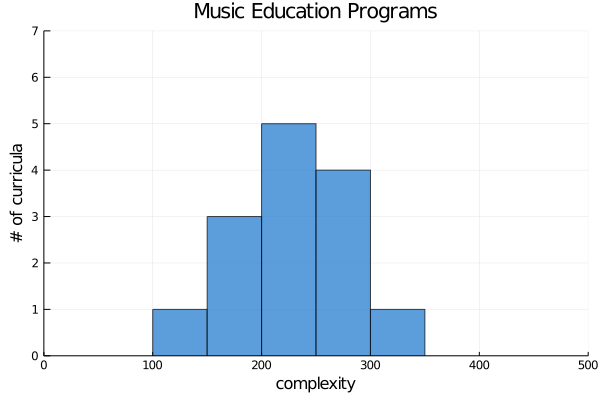

****** Animal Science Programs ******

 Metric -- complexity
  Number of curricula = 20
  Mean = 139.65
  STD = 13.338145485786248
  Max. = 307.0
  Min. = 71.0


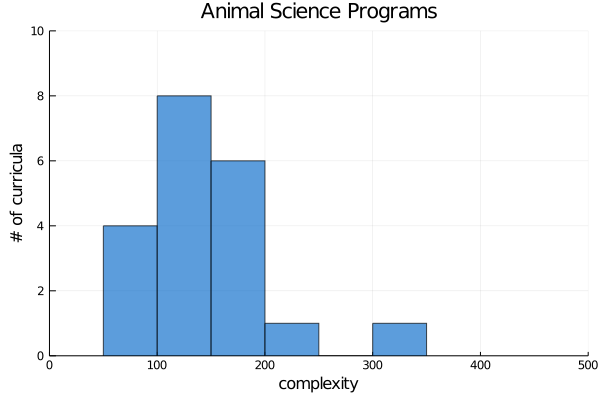

****** Mechanical Engineering Programs ******

 Metric -- complexity
  Number of curricula = 11
  Mean = 333.3636363636364
  STD = 5.619075058040138
  Max. = 514.0
  Min. = 140.0


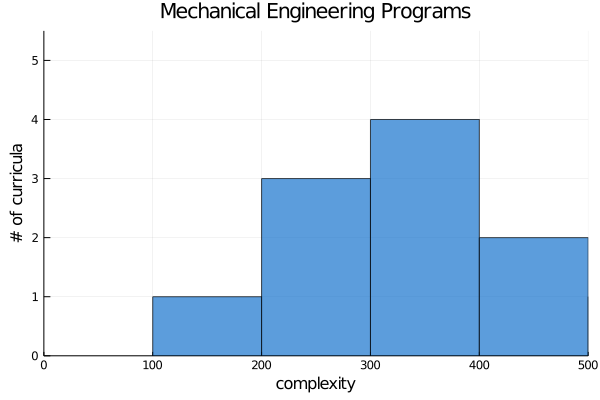

****** Psychology Programs ******

 Metric -- complexity
  Number of curricula = 13
  Mean = 77.6923076923077
  STD = 2.133462293173958
  Max. = 114.0
  Min. = 40.0


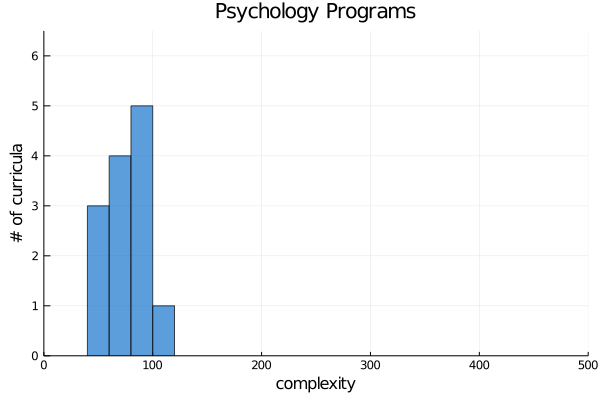

In [7]:
# Find all programs with the keywords listed below in their names, and store them in corresponding arrays.
program_types = Dict{String, Array{Curriculum,1}}("animal-science" => [], "mechanical-engineering" => [], "music-education" => [], "psychology" => [])
program_keyword = Dict{String, String}("animal-science" => "animal", "mechanical-engineering" => "mechanical", "music-education" => "music", "psychology" => "psychology")
metric = "complexity"
for (k, programs) in program_types
    for school in schools
      path = "./cluster/$(school)"
      for file in readdir(path)
        if (occursin(program_keyword[k], file) && occursin(".csv", file))
          program_name = replace(file, ".csv" => "")
          push!(programs, schools_plans[school][program_name].curriculum);
        end
      end
    end
    println("****** $(replace(titlecase(k), "-" => " ")) Programs ******")
    stats = basic_statistics(programs, "complexity")
    println(String(take!(stats))); flush(stdout)  
    display(metric_histogram(programs, metric, title="$(replace(titlecase(k), "-" => " ")) Programs", 
             xlabel="$(metric)", ylabel="# of curricula", xlim=(0,500)))
end

In order to get a better sense of the curricular complexity variations between disciplines, the `metric_boxplot()` function can be used to simultaneously display (on the same scale) the curricular complexity variations in all four disciplines, i.e., the inter-discipline curricular complexities.   

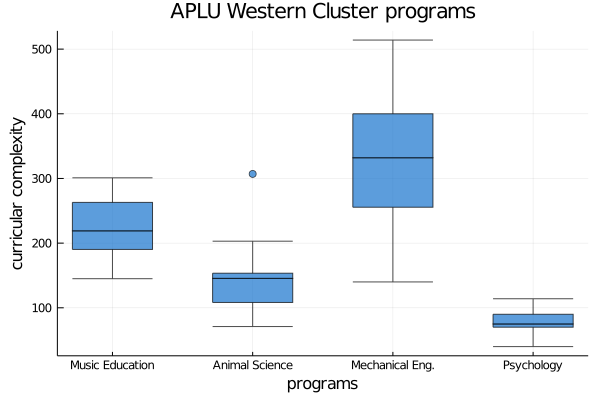

In [8]:
metric_boxplot(["Music Education" "Animal Science" "Mechanical Eng." "Psychology"], [program_types["music-education"], 
      program_types["animal-science"], program_types["mechanical-engineering"], program_types["psychology"]], 
      "complexity", title="APLU Western Cluster programs", xlabel="programs", ylabel="curricular complexity")

The smallest mean and variance occur in the psychology programs, where the average curricular complexity is 77 units, and the standard deviation is only 2.11.  All but one of the psychology programs have a curricular complexity of less than 100 units.  The largest mean and variance occur in the mechanical engineering programs.  The average complexity for mechanical engineering programs is 319 units, with a variance of 7.13.  Music education programs as a whole have curricula that are more complex than animal science programs.  Music education programs appear closer in curricular complexity to mechanical engineering programs than they do to psychology programs.

Below are two animal science programs that differ significantly in terms of curricular complexity.  It would be interesting to compare the learning outcomes and student success rates of these two programs.

In [8]:
dp = schools_plans["university-of-nevada-reno"]["animal-science"]
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src => "http://localhost:8156",:id => "curriculum",:events => Dict{Symbol,WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Animal Science\",\"dp_name\":\"4-Year Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":6.0,\"centrality\":0,\"blocking factor\":3,\"delay factor\":3.0},\"nameSub\":\"ENG 101\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":30.0,\"centrality\":0,\"blocking factor\":22,\"delay factor\":8.0},\"nameSub\":\"MATH 126\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":8.0,\"centrality\":0,\"blocking factor\":5,\"delay factor\":3.0},\"nameSub\":\"AGSC 100\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":4,\"type\":\"CurriculumCorequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"ECON 102\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Fine Arts\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":6,\"type\":\"CurriculumCorequisite\"},{\"source_id\":9,\"target_id\":6,\"type\":\"CurriculumCorequisite\"},{\"source_id\":2,\"target_id\":6,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":25.0,\"centrality\":576,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"CHEM 121A\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":7,\"type\":\"CurriculumCorequisite\"},{\"source_id\":2,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":26.0,\"centrality\":576,\"blocking factor\":18,\"delay factor\":8.0},\"nameSub\":\"CHEM 121L\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":4.0,\"centrality\":3,\"blocking factor\":1,\"delay factor\":3.0},\"nameSub\":\"ENG 102\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":27.0,\"centrality\":502,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"MATH 127\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AGSC 211\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"APST 207\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":13,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":6,\"target_id\":13,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":17.0,\"centrality\":379,\"blocking factor\":9,\"delay factor\":8.0},\"nameSub\":\"BIO

In [10]:
dp = schools_plans["utah-state"]["animal-science-equine"]
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src => "http://localhost:8156",:id => "curriculum",:events => Dict{Symbol,WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Animal Science (Equine)\",\"dp_name\":\"4-Year Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ADVS 1110\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":9.0,\"centrality\":0,\"blocking factor\":5,\"delay factor\":4.0},\"nameSub\":\"BIOL 1610\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"BIOL 1615\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"ENGL 1010\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MATH 1050\",\"id\":5,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ADVS 1050\",\"id\":6,\"credits\":1,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ADVS 1600\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"ADVS 2190\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":8.0,\"centrality\":11,\"blocking factor\":4,\"delay factor\":4.0},\"nameSub\":\"BIOL 1620\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"BIOL 1625\",\"id\":10,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"STAT 1040\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective 1\",\"id\":12,\"credits\":2,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":8,\"target_id\":13,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"ADVS 2300\",\"id\":13,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"CHEM 1210\",\"id\":14,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"CHEM 1215\",\"id\":15,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0}

Similarly, below are the mechanical engineering programs in the cluster having maximal and minimal curricular complexity.  It would also be interesting to compare the learning outcomes and student success rates of these two programs.  Note: Given that both are ABET accredited programs, they should have the same learning outcomes.

In [11]:
dp = schools_plans["colorado-state"]["mechanical-engineering"]
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src => "http://localhost:8156",:id => "curriculum",:events => Dict{Symbol,WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Mechanical Engineering\",\"dp_name\":\"4-Year Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"CHEM 111\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"CHEM 112\",\"id\":2,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"CO 150\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":33.0,\"centrality\":0,\"blocking factor\":26,\"delay factor\":7.0},\"nameSub\":\"MATH 160\",\"id\":4,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":14.0,\"centrality\":0,\"blocking factor\":9,\"delay factor\":5.0},\"nameSub\":\"MECH 103\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":6,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":22.0,\"centrality\":70,\"blocking factor\":15,\"delay factor\":7.0},\"nameSub\":\"MATH 161\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":8,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":14.0,\"centrality\":44,\"blocking factor\":8,\"delay factor\":6.0},\"nameSub\":\"MECH 105\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":28.0,\"centrality\":81,\"blocking factor\":22,\"delay factor\":6.0},\"nameSub\":\"PH 141\",\"id\":8,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"AUCC 3B\",\"id\":9,\"credits\":6,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":8,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":13.0,\"centrality\":22,\"blocking factor\":7,\"delay factor\":6.0},\"nameSub\":\"CIVE 260\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":17.0,\"centrality\":52,\"blocking factor\":10,\"delay factor\":7.0},\"nameSub\":\"MATH 261\",\"id\":11,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":8.0,\"centrality\":11,\"blocking factor\":2,\"delay factor\":6.0},\"nameSub\":\"MECH 200\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":13,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":8.0,\"centrality\":11,\"blocking factor\":2,\"delay factor\":6.0},\"nameSub\":\"MECH 201\",\"id\":13,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":8,\"target_id\":14,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":6,\"target_id\":14,\"type\":\"Cu

In [12]:
dp = schools_plans["new-mexico-state"]["mechanical-engineering"]
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src => "http://localhost:8156",:id => "curriculum",:events => Dict{Symbol,WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Mechanical Engineering\",\"dp_name\":\"4-Year Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENGL 111G\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":18.0,\"centrality\":0,\"blocking factor\":12,\"delay factor\":6.0},\"nameSub\":\"MATH 191G\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"M E 159\",\"id\":3,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENGR 100\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":5,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"MATH 192G \",\"id\":5,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":6,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":16.0,\"centrality\":22,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"PHYS 215G\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":7,\"type\":\"CurriculumCorequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":3.0},\"nameSub\":\"PHYS 215GL\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"M E 222\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"English Comp\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\" \",\"metrics\":{\"complexity\":11.0,\"centrality\":11,\"blocking factor\":5,\"delay factor\":6.0},\"nameSub\":\"M E 236\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"MATH 291G\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"PHYS 216G\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"M E 210\",\"id\":13,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"M E 261\",\"id\":14,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":3},{\"name\":\"Term 4\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":7.0,\"centrality\":

## Degree Plan Analytics
Next let us take into account the term-by-term information associated with a degree plan. A degree plan adds a temporal element to a curriculum. The manner in which a curriculum is structured over time in the form of a degree plan can impact the success rates of students attempting to complete the curriculum.

### Analysis of a single degree plan 
The `basic_metrics()` function can be applied to a degree plan in order to obtain information about how the credit hours in the curriculum are spread over the terms in the degree plan.  As an example, consider the music education and mechanical engineering programs at Colorado State University.

In [27]:
dp = schools_plans["colorado-state"]["music-education"]
metrics = basic_metrics(dp)
println(String(take!(metrics)))


Curriculum: Music Education
Degree Plan: 4-Year Plan
  total credit hours = 120
  number of terms = 8
  max. credits in a term = 17, in term 1
  min. credits in a term = 11, in term 6
  avg. credits per term = 15.0, with std. dev. = 1.7320508075688772



In [28]:
dp = schools_plans["colorado-state"]["mechanical-engineering"]
metrics = basic_metrics(dp)
println(String(take!(metrics)))


Curriculum: Mechanical Engineering
Degree Plan: 4-Year Plan
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 20, in term 4
  min. credits in a term = 13, in term 6
  avg. credits per term = 16.125, with std. dev. = 2.0879116360612584



### Degree plan optimization
The Curricular Analytics toolbox contains a number of functions that will create different degree plans for a curriculum depending upon various optimization criteria.  In order to use these functions, you must first install the Gourbi solver, called [Gurobi Optimizer](https://www.gurobi.com/downloads/gurobi-optimizer-eula). Gurobi is a commercial product, and requires a license key; however, [academic licenses](https://www.gurobi.com/downloads/end-user-license-agreement-academic) are available at no cost.

In [36]:
# Uncomment the following two lines if the Gurobi package has not yet been included in your Julia environment.
#using Pkg
#Pkg.add("Gurobi")
using Gurobi

First we will create a degree plan for the Colorado State mechanical engineering program that attempts to balance the credits evenly across eight terms.  This is accomplished by passing the `"Balance"` objective to the `optimize_plan()` function.

In [37]:
dp = schools_plans["colorado-state"]["mechanical-engineering"]
dp_new = optimize_plan(dp.curriculum, 8, 12, 18, ["Balance"]);
visualize(dp_new, notebook=true)

LoadError: UndefVarError: optimize_plan not defined

Notice that rearranging the terms in which courses are offered has no impact on curricular complexity.  I.e., curricular complexity is a function of the curriculum, not the plan created for the curriculum.  In order to see if the new plan is more balanced, run the `basic_metrics()` function on the new degree plan.

In [38]:
metrics = basic_metrics(dp_new)
println(String(take!(metrics)))

LoadError: UndefVarError: dp_new not defined

In [18]:
dp_new = optimize_plan(dp.curriculum, 8, 12, 18, ["Prereq"]);
visualize(dp_new, notebook=true)

LoadError: UndefVarError: dp not defined

In [19]:
metrics = basic_metrics(dp_new)
println(String(take!(metrics)))

LoadError: UndefVarError: dp_new not defined

Thus, the new degree plan is more balanced than the original degree; however, the new degree plan has some features that are probably not desirable, e.g., technical electives in the first term.  These courses could be swapped with core courses that appear later in the curriculum.  In addition, it is possible to "lock" any course into a particular term as a part of the specificiations provided to `optimize_plan()`.  Finally, notice the chemistry is now taken much later in the new curriculum (in term 6 rather than term 1).

Next, we demonstrate the multi-objective capabilities of the `optimize_plan()` function.  Below we provide two objectives; `"Balance"` attempts to balance the credit hours across the terms as evenly as possible, and `"Prereq"` attempts to keep the pre- and co-requisites of every course as close as possible to the course that requires them. 

In [20]:
dp_new = optimize_plan(dp.curriculum, 8, 12, 18, ["Balance", "Prereq"]);
visualize(dp_new, notebook=true)

LoadError: UndefVarError: dp not defined

Notice that as compared to the prior degree plan (the one that only used the `"Balance"` objective), MECH 103 is now closer to MECH 105, and MECH 105 is now closer to MECH 200, MECH 201, and MECH 231.  In addition, the degree plan maintained the same balance that the previous plan had, as demonstrated below.

In [21]:
metrics = basic_metrics(dp_new)
println(String(take!(metrics)))

LoadError: UndefVarError: dp_new not defined

## References
<a id='References'></a>

APLU, Powered by Publics website (accessed August 15, 2019). https://www.aplu.org/projects-and-initiatives/center-for-public-university-transformation/powered-by-publics

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.